#### Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Importing the dataset

In [75]:
df1= pd.read_csv(r"C:\Users\udayk\Downloads\matches.csv")

In [93]:
df1.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [86]:
df2= pd.read_csv(r"C:\Users\udayk\Downloads\deliveries.csv")

In [87]:
df2.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


#### 1.Which of the following is the right way to merge 2 datasets for getting better insights from the data


we can not merge the two datasets as per the left and right because it can give nan values and we have to change the columns to similar names, so that we can merge two datasets based on common columns.

#### 2.The column which has the most missing values according to the data is:

In [77]:
df1.isna().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

Umpire3 is having the most number of missing values

#### 3.City which hosted most number of seasons according to the data is:

In [131]:
df1.city.value_counts().nlargest(1)

city
Mumbai    101
Name: count, dtype: int64

#### 4. Which year has the most number of matches played?

In [79]:
df1["season"].value_counts().nlargest(1)

season
2013    76
Name: count, dtype: int64

#### 5. Maximum wins by Mumbai Indians in 2011 are

In [80]:
len(df1[(df1["season"]==2011) & (df1["winner"]=="Mumbai Indians")])

10

#### 6. For 'toss_decision' feature what kind of plot is suitable?

<Axes: xlabel='toss_decision'>

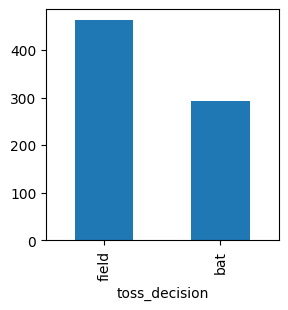

In [81]:
df1["toss_decision"].value_counts().plot(kind= "bar",figsize=(3,3))

<Axes: ylabel='count'>

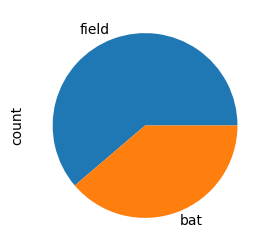

In [82]:
df1["toss_decision"].value_counts().plot(kind= "pie",figsize=(3,3))

#### 7. What is the percentage of getting bat and field in feature 'toss_descision'?

<Axes: ylabel='count'>

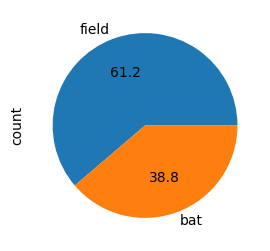

In [83]:
df1["toss_decision"].value_counts().plot(kind= "pie",figsize=(3,3),autopct= "%1.1f")

#### 8.Which statement holds true

In [110]:
bat_first= df1[(df1["season"])& (df1["toss_decision"]=="bat") & (df1["toss_winner"]==df1["winner"])]

In [117]:
len(bat_first) 

76

In [116]:
len(fielding_first)  #Teams winning tosses and electing field first have won more number of matches

129

#### 9. In which years where taking batting second have won more number of matches?

In [114]:
fielding_first= df1[(df1["season"])& (df1["toss_decision"]=="field") & (df1["toss_winner"]==df1["winner"])]

In [128]:
fielding_first["season"].value_counts()

season
2019    31
2017    28
2011    27
2013    15
2009    14
2015    14
Name: count, dtype: int64

#### 10. To plot the most consistent batsmen among top 10 run getters, what plotting technique we use?

In [141]:
df2.groupby("batsman")["total_runs"].sum().nlargest(10)

batsman
SK Raina          5651
V Kohli           5616
RG Sharma         5057
DA Warner         4975
S Dhawan          4876
CH Gayle          4873
RV Uthappa        4703
MS Dhoni          4691
AB de Villiers    4583
G Gambhir         4485
Name: total_runs, dtype: int64

<Axes: >

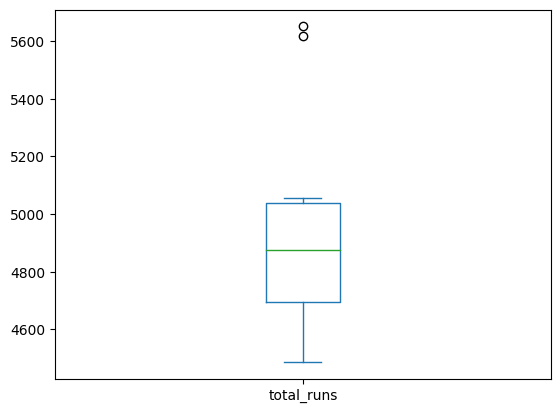

In [139]:
# when the variance is small then the variable most consistent/stable
# so that which value is closer to the median line that can be treated as the consistent 
# s.dhawan is the most consistent player

df2.groupby("batsman")["total_runs"].sum().nlargest(10).plot(kind="box")

#### 11. In 2019 which batsman scored highest number of runs by hitting 6's and 4's?

In [177]:
df2.rename(columns = {'match_id':'id'}, inplace = True)

In [200]:
df_merged = pd.merge(df2,df1,on="id",how="outer")

In [202]:
highest_runs = df_merged[(df_merged["season"]==2019) & (df_merged["batsman_runs"]==4) | (df_merged["batsman_runs"]==6)]

In [204]:
highest_runs["batsman"].value_counts().nlargest(1)

batsman
CH Gayle    374
Name: count, dtype: int64

#### 12. Most number of wickets taken by a bowler is

In [217]:
wickets = df_merged[(df_merged['dismissal_kind'] == 'bowled') | (df_merged['dismissal_kind'] == 'caught')|(df_merged['dismissal_kind'] == 'lbw')|(df_merged['dismissal_kind'] == 'caught and bowled')|(df_merged['dismissal_kind'] == 'stumped')|(df_merged['dismissal_kind'] == 'hit wicket')]

wickets['bowler'].value_counts().nlargest(1)

bowler
SL Malinga    170
Name: count, dtype: int64

#### 13.  What is the strike rate of Kohli in 2016


In [208]:
virat_kohli= df_merged[(df_merged["season"]==2016)& (df_merged["batsman"]=="V Kohli")]

In [214]:
len(virat_kohli)

655

In [215]:
(virat_kohli["total_runs"].sum()/len(virat_kohli))*100

152.36641221374046

#### 14.Bowlers with maximum number of extras:

In [88]:
df2.groupby("bowler")["extra_runs"].sum().nlargest(1)

bowler
SL Malinga    293
Name: extra_runs, dtype: int64

#### 15.Which venue has hosted most number of IPL matches?

In [89]:
df1["venue"].value_counts().nlargest(1)

venue
Eden Gardens    77
Name: count, dtype: int64

#### 16. In 2017 when sunrisers hyderabad clashed against Royal Challengers Bangalore which team player won player of the match?

In [157]:
player_of_the_match= df1[(df1["season"]==2017) & (df1["team1"]=="Sunrisers Hyderabad") & (df1["team2"]=="Royal Challengers Bangalore")]

In [158]:
player_of_the_match.iloc[0,13]

'Yuvraj Singh'

#### 17. Across seasons who are the top three batsman's with most number of run out?

In [122]:
run_out= df2[df2["dismissal_kind"]=='run out']

In [127]:
run_out["batsman"].value_counts().nlargest(5)

batsman
MS Dhoni      21
RG Sharma     17
KD Karthik    16
G Gambhir     15
V Kohli       15
Name: count, dtype: int64

#### 18. What are the total runs scored by V Kohli when the bowler was JJ Burmah?

In [90]:
df3= df2[(df2["batsman"]=="V Kohli") & (df2["bowler"]=="JJ Bumrah")]

In [91]:
df3["total_runs"].sum()

114

#### 19. Across all seasons which player was dismissed the maximum number of times via caught and bowled

In [165]:
dismissed = df2[(df2["dismissal_kind"]=='caught') | (df2["dismissal_kind"]=="bowled")]

In [168]:
dismissed["batsman"].value_counts().nlargest(1)

batsman
SK Raina    128
Name: count, dtype: int64

#### 20. which player has the highest hard-hitting ability?


In [174]:
hard_hitter = df2[df2["batsman_runs"]==6]

In [176]:
hard_hitter["batsman"].value_counts().nlargest(1)

batsman
CH Gayle    327
Name: count, dtype: int64